In [10]:
import mod1
import importlib
importlib.reload(mod1)

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from statsmodels.tsa.arima_model import ARIMA

In [35]:
list_tickers = [
        'MSFT',
        'AAPL',
        'SPY'
    ]
dict_ticker = mod1.create_dict_tickers(list_tickers)
period = '5y'
hist_msft = dict_ticker['MSFT'].history(period)
hist_aapl = dict_ticker['AAPL'].history(period)
hist_spy  = dict_ticker['SPY'].history(period)
msft = hist_msft['Open']
aapl = hist_aapl['Open']
spy  = hist_spy['Open']

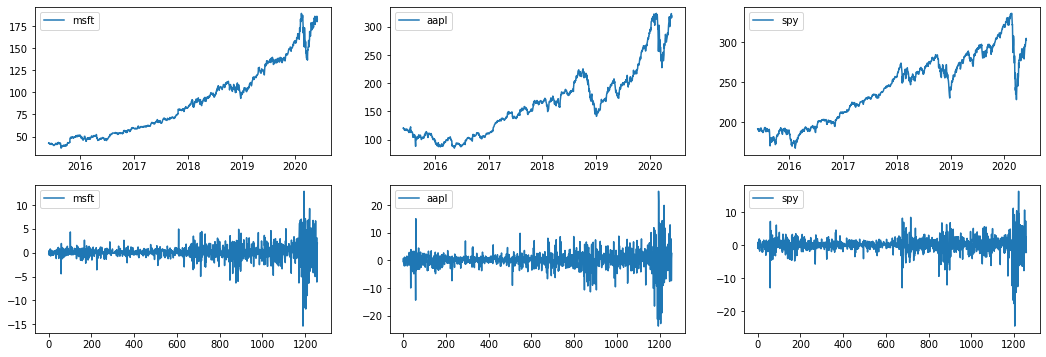

In [49]:
plt.figure(1,figsize=(18,6))
ax1 = plt.subplot(231)
ax1.plot(msft)
ax1.legend(['msft'])
ax2 = plt.subplot(232)
ax2.plot(aapl)
ax2.legend(['aapl'])
ax3 = plt.subplot(233)
ax3.plot(spy)
ax3.legend(['spy'])

ax1 = plt.subplot(234)
ax1.plot(np.diff(msft))
ax1.legend(['msft'])
ax2 = plt.subplot(235)
ax2.plot(np.diff(aapl))
ax2.legend(['aapl'])
ax3 = plt.subplot(236)
ax3.plot(np.diff(spy))
ax3.legend(['spy'])
plt.show()

In [53]:
model = ARIMA(msft.values, order=(1,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
aa = model_fit.summary()

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 1258
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -2488.413
Method:                       css-mle   S.D. of innovations              1.749
Date:                Sat, 30 May 2020   AIC                           4982.826
Time:                        16:09:50   BIC                           4998.237
Sample:                             1   HQIC                          4988.618
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1113      0.044      2.528      0.011       0.025       0.198
ar.L1.D.y     -0.1205      0.028     -4.305      0.000      -0.175      -0.066
                                    Roots           

In [74]:
model = ARIMA(msft.values, order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())
aa = model_fit.summary()

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 1258
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2483.819
Method:                       css-mle   S.D. of innovations              1.743
Date:                Sat, 30 May 2020   AIC                           4975.638
Time:                        16:17:25   BIC                           4996.187
Sample:                             1   HQIC                          4983.361
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1113      0.039      2.838      0.005       0.034       0.188
ar.L1.D.y      0.2978      0.121      2.460      0.014       0.061       0.535
ma.L1.D.y     -0.4399      0.113     -3.909      0.0

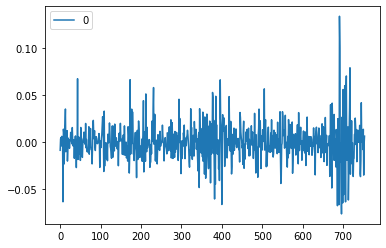

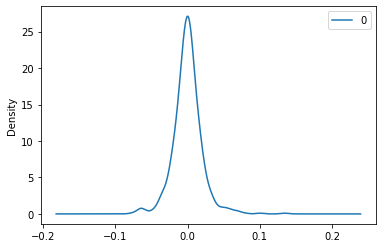

                0
count  754.000000
mean    -0.000004
std      0.019833
min     -0.076610
25%     -0.009614
50%     -0.000011
75%      0.008822
max      0.134042


In [13]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())